In [11]:
# A simple two class classification machine learning model (supervised model).

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
dataset = [[2.7810836,2.550537003,0],
[1.465489372,2.362125076,0],
[3.396561688,4.400293529,0],
[1.38807019,1.850220317,0],
[3.06407232,3.005305973,0],
[7.627531214,2.759262235,1],
[5.332441248,2.088626775,1],
[6.922596716,1.77106367,1],
[8.675418651,-0.242068655,1],
[7.673756466,3.508563011,1]]

learning_rate = 0.1
epoch = 5

In [14]:
# Predict the class according to the weights
def predict(row, weights):
    act = weights[0] # The threshold or bias
    # summation(wi * ri) >= 0 -> class 1, else class 0
    for i in range(len(row) - 1):
        act += weights[i + 1] * row[i]
    if act >= 0.0:
        return 1
    else:
        return 0

In [15]:
# Train and calculate weights using stochastic gradient descent.
# Can be found be solving a equation of n variables as well.
def train_weights(train, learning_rate, epoch):
    weights = [0.0 for i in range(len(train[0]))]
    for ep in range(epoch):
        sum_error = 0.0
        for row in train:
            pred = predict(row, weights)
            error = row[-1] - pred
            sum_error += error **2
            weights[0] = weights[0] + learning_rate * error
            for i in range(len(row) - 1):
                weights[i + 1] = weights[i + 1] + learning_rate * error * row[i]

    return weights

In [16]:
# Not working :(
def train_weights_solving_linear_eq(train):
    x = []
    y = []
    for t in train:
        x.append(t[0:len(t) - 1])
        y.append(t[-1])
    
    print(x, y)
    weights = np.linalg.solve(x,y)
    print(weights)
    return np.linalg.inv(weights)

In [17]:
weights = train_weights(dataset, learning_rate, epoch)
weights

[-0.1, 0.20653640140000007, -0.23418117710000003]

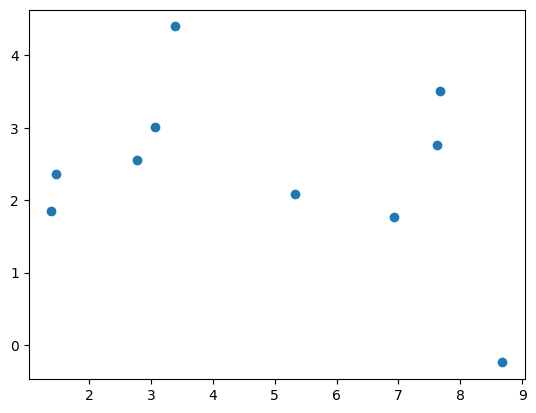

In [18]:
x = []
y = []

_x = []
_y = []

for t in dataset:
    x.append(t[0:len(t) - 1])
    y.append(t[-1])
    _x.append(t[0])
    _y.append(t[1])

x = np.array(x)
y = np.array(y)
plt.scatter(_x, _y)

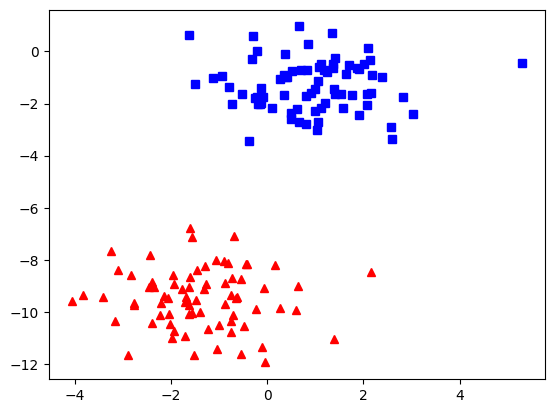

Signature:
datasets.make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
Docstring:
Generate isotropic Gaussian blobs for clustering.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or array-like, default=100
    If int, it is the total number of points equally divided among
    clusters.
    If array-like, each element of the sequence indicates
    the number of samples per cluster.

    .. versionchanged:: v0.20
        one can now pass an array-like to the ``n_samples`` parameter

n_features : int, default=2
    The number of features for each sample.

centers : int or ndarray of shape (n_centers, n_features), default=None
    The number of centers to generate, or the fixed center locations.
    If n_samples is an int and centers is None, 3 centers are generated.
    If n_samples is array-like, ce

In [19]:
from sklearn import datasets
x, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)

plt.plot(x[:,0][y == 0], x[:,1][y == 0], 'r^')
plt.plot(x[:,0][y == 1], x[:,1][y == 1], 'bs')

datasets.make_blobs?

In [20]:
def perceptron(x, y, learning_rate, epoch):
    m, n= x.shape
    theta = np.zeros((n+1, 1))
    print(theta)
    n_miss_classified_list = []
    for _epc in range(epoch):
        n_miss_classified = 0

        for idx, x_i in enumerate(x):
            x_i = np.insert(x_i, 0, 1).reshape(-1, 1)

            y_hat = 0
            if np.dot(x_i.T, theta, out=None) > 0.0:
                y_hat = 1
            else:
                y_hat = 0

            # np.squeeze : remove axes of length one
            # so, np.squeeze([[[0], [1], [2]]]) will give [[0], [1], [2]] etc.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += learning_rate * ((y[idx] - y_hat) * x_i)

                n_miss_classified += 1

            n_miss_classified_list.append(n_miss_classified)

        return theta, n_miss_classified_list

theta, n_miss_classified_list = perceptron(x, y, learning_rate, epoch)

[[0.]
 [0.]
 [0.]]


In [21]:
def plot_decision_boundary(x, theta):
    # y = mx + c
    # mx + c -> theta0.x0 + theta1.x1 + theta2.x2
    # Solve for m and c
    # m = -theta1 / theta2
    # c = -theta0 / theta2
    m = -theta[1] / theta[2]
    c = -theta[0] / theta[2]

    x1 = [min(x[:,0]), max(x[:,0])]
    x2 = m * x1 + c

    plt.plot(x[:,0][y == 0], x[:,1][y == 0], "r^")
    plt.plot(x[:,0][y == 1], x[:,1][y == 1], "bs")
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.plot(x1, x2, 'y-')

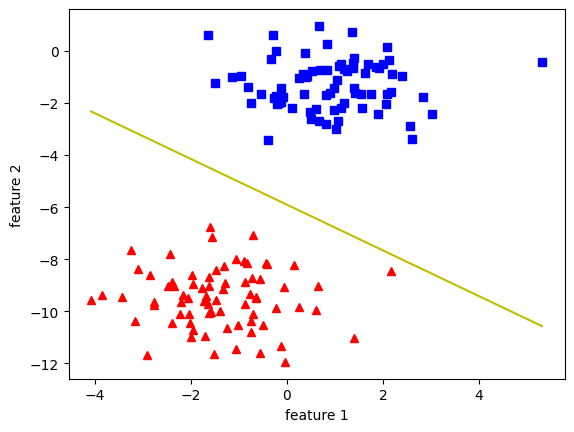

In [22]:
plot_decision_boundary(x, theta)

In [23]:
# Using scikit learns inbuilt linear classifier
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
x, y = load_digits(return_X_y=True)
p_classifier = Perceptron(tol=1e-3, random_state=333)
p_classifier.fit(x, y)
p_classifier.score(x, y)


0.9643850862548692

In [24]:
# Practical application : on the wine data set
import pandas as pd
df = pd.read_csv('../data_sets/winequality-red.csv')
df

x = df.iloc[:,0:len(df.quality) - 1,]
y = df.quality

p_classifier = Perceptron(tol=1e-3, random_state=1)
p_classifier.fit(x, y)
print("Score using wine data set when target feature is quality : ", p_classifier.score(x, y))


Score using wine data set when target feature is quality :  0.6460287679799875


In [25]:
# Using the custom algorithm to classify data

# Will not work as each feature would require a perceptron on its own.
# perceptron(x, y, learning_rate, epoch)


In [26]:
# Using the IRIS data set
df = sb.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:

x = df.iloc[:,:3]
y = df.species
p_classifier = Perceptron(tol=1e-3, random_state=1)
p_classifier.fit(x, y)
print("Score using perceptron when target feature is species : ", p_classifier.score(x, y))

Score using perceptron when target feature is species :  0.9133333333333333
